# Univariate Statistics

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectPercentile, SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt

In [2]:
cancer = load_breast_cancer()

# get deterministic random numbers
rng = np.random.RandomState(42)
noise = rng.normal(size=(len(cancer.data), 50))
# add noise features to the data
# the first 30 features are from the dataset, the next 50 are noise
X_w_noise = np.hstack([cancer.data, noise])

X_train, X_test, y_train, y_test = train_test_split(
	X_w_noise, cancer.target, random_state=0, test_size=.5)
# use f_classif (the default) and SelectPercentile to select 50% of features
select = SelectPercentile(f_regression, percentile=50)
select.fit(X_train, y_train)
# transform training set
X_train_selected = select.transform(X_train)

print("X_train.shape: {}".format(X_train.shape))
print("X_train_selected.shape: {}".format(X_train_selected.shape))

X_train.shape: (284, 80)
X_train_selected.shape: (284, 40)


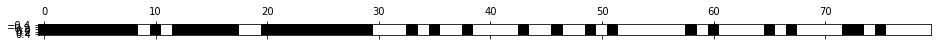

In [3]:
# Take a look which features are chosen, which are not
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')
# -1 can be interpreted as the length of the array
# allowed for the dimension parameters to be passed in as seperated arguments

In [4]:
from sklearn.linear_model import LogisticRegression

# transform test data
X_test_selected = select.transform(X_test)

lr = LogisticRegression(max_iter=9899)
lr.fit(X_train, y_train)
print("Score with all features: {:.3f}".format(lr.score(X_test, y_test)))
lr.fit(X_train_selected, y_train)
print("Score with only selected features: {:.3f}".format(
	lr.score(X_test_selected, y_test)))

Score with all features: 0.951
Score with only selected features: 0.933


# Model-based feature selection

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

In [6]:
select = SelectFromModel(RandomForestClassifier(100, random_state=42), threshold='median')
select.fit(X_train,y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))

X_train.shape: (284, 80)
X_train_l1.shape: (284, 40)


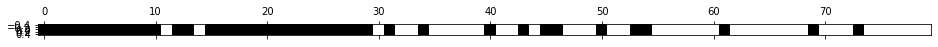

In [7]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [8]:
X_test_l1 = select.transform(X_test)
score = LogisticRegression(max_iter=9999).fit(X_train_l1, y_train).score(X_test_l1, y_test)
score

0.9473684210526315

<BarContainer object of 30 artists>

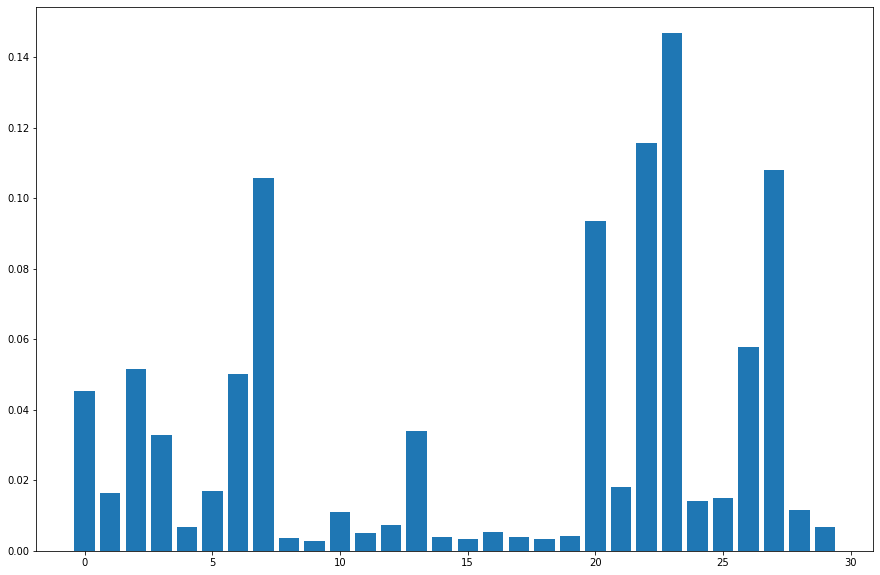

In [9]:
# Self-practice
rf = RandomForestClassifier().fit(cancer.data,cancer.target)
rf.feature_importances_
plt.figure(figsize=(15,10))
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)

# Iterative Feature Selection

In [16]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(random_state=42), n_features_to_select=40)
select.fit(X_train,y_train)

RFE(estimator=RandomForestClassifier(random_state=42), n_features_to_select=40)

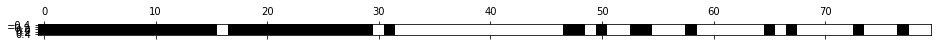

In [17]:
mask = select.get_support()
plt.matshow(mask.reshape(1,-1), cmap='gray_r')

In [19]:
X_train_rfe = select.transform(X_train)
X_test_rfe = select.transform(X_test)
score = LogisticRegression(max_iter=9999).fit(X_train_rfe,y_train).score(X_test_rfe, y_test)
print(score)

0.9403508771929825


In [20]:
select.score(X_test, y_test)

0.9508771929824561